In [24]:
import numpy as np
import os, warnings
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.python.data.ops.dataset_ops import AUTOTUNE
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.ops.variables import validate_synchronization_aggregation_trainable
from tensorflow.python.platform.tf_logging import warning
import tensorflow_hub as hub
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import gridspec


In [25]:
# Seed setup
def set_seed(seed = 31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED']= str(seed)
    os.environ['TF_DETERMINISTIC_OPS']='1'

set_seed()

# Set pyplot configs
plt.rc('figure',autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap = 'magma')
warnings.filterwarnings('ignore')

In [26]:
# Load data - train and valid datasets
train_path = 'CNN_CarTruck_Classifier\train'
train_ds = image_dataset_from_directory(
    directory='train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

valid_path = 'CNN_CarTruck_Classifier\valid'
valid_ds = image_dataset_from_directory(
    directory='valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [27]:
# Convert to float
def convert_float(image, label):
    image = tf.image.convert_image_dtype(image,dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = (
    train_ds
    .map(convert_float)
    .cache()
    .prefetch(buffer_size = AUTOTUNE)
)

valid_ds = (
    valid_ds
    .map(convert_float)
    .cache()
    .prefetch(buffer_size = AUTOTUNE)
)

In [31]:
handle = 'https://tfhub.dev/google/imagenet/inception_v1/classification/5'
pre_trained_model = hub.KerasLayer(handle)


In [54]:
from tensorflow import keras
from tensorflow.keras import layers

keras.backend.clear_session()
# Build model architecture
model = keras.Sequential([
    pre_trained_model,
    layers.Flatten(),
    layers.Dense(units=6, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

In [55]:
# Train model
optimizer = 'adam'
loss = 'binary_crossentropy'

model.compile(optimizer,loss,metrics=['binary_accuracy'])

In [56]:
history = model.fit(train_ds, validation_data=valid_ds,epochs=30)

Epoch 1/30
80/80 [==============================] - 5s 45ms/step - loss: 0.6047 - binary_accuracy: 0.7289 - val_loss: 0.4267 - val_binary_accuracy: 0.8064
Epoch 2/30
80/80 [==============================] - 3s 39ms/step - loss: 0.4067 - binary_accuracy: 0.8134 - val_loss: 0.3946 - val_binary_accuracy: 0.8274
Epoch 3/30
80/80 [==============================] - 3s 38ms/step - loss: 0.3695 - binary_accuracy: 0.8308 - val_loss: 0.3718 - val_binary_accuracy: 0.8400
Epoch 4/30
80/80 [==============================] - 3s 39ms/step - loss: 0.3471 - binary_accuracy: 0.8423 - val_loss: 0.3755 - val_binary_accuracy: 0.8400
Epoch 5/30
80/80 [==============================] - 3s 40ms/step - loss: 0.3300 - binary_accuracy: 0.8530 - val_loss: 0.3669 - val_binary_accuracy: 0.8422
Epoch 6/30
80/80 [==============================] - 3s 39ms/step - loss: 0.3175 - binary_accuracy: 0.8614 - val_loss: 0.3590 - val_binary_accuracy: 0.8448
Epoch 7/30
80/80 [==============================] - 3s 39ms/step - los

<AxesSubplot:>

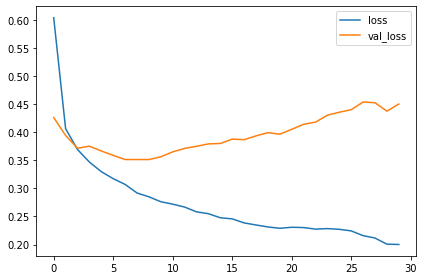

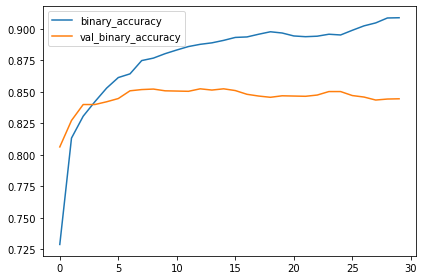

In [57]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss','val_loss']].plot()
history_frame.loc[:,['binary_accuracy','val_binary_accuracy']].plot()

In [118]:
# Visualize images and labels

for images, labels in train_ds.take(1):
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

# Call predictions
classifications = model.predict(numpy_images)



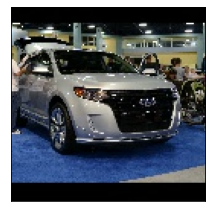

[1.]


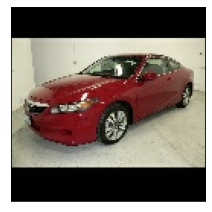

[0.]


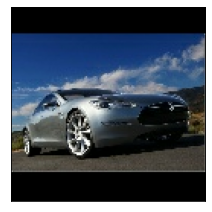

[0.]


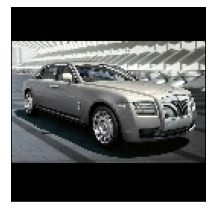

[0.]


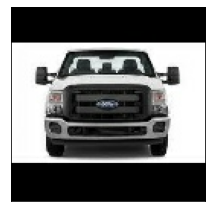

[1.]


In [125]:
class_names = ['1.', '0.']

def plot_img(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    img = np.squeeze(img)
    plt.imshow(img, cmap=plt.cm.binary)

    predcited = np.argmax(predictions_array)

    if predcited == true_label:
        color = 'green'
    else:
        color = 'red'

    return color

max_index = 5

for index in range(0, max_index):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)

    plot_img(index, classifications, numpy_labels, numpy_images)
    plt.show()
    print (numpy_labels[index])
    